<a href="https://colab.research.google.com/github/android-kunjapppan/PyTorch-Tutorial/blob/master/Pytorch_Lec4_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import torch
from torchvision import transforms,datasets

train = datasets.MNIST("",train=True,download=True,
                       transform=transforms.Compose([
                                                      transforms.ToTensor()
                         ]))


test = datasets.MNIST("", train=False, download= True,
                      transform = transforms.Compose([
                                                      transforms.ToTensor()
                      ]))


trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10, shuffle =True)

In [24]:
# Building a NN
import torch.nn as nn
import torch.nn.functional as F

In [36]:
class Net(nn.Module):

  def __init__(self):
    super().__init__()      # Initialising nn.Module
    
    # Defining the fully connected Layers
    self.fc1 = nn.Linear(784, 64)
    self.fc2 = nn.Linear(64,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,10)

  # Feed Forward Neural Network
  def forward(self,x):
    x = F.relu(self.fc1(x)) 
    # x passes through fc1 with relu activation

    x = F.relu(self.fc2(x)) 
    # x passes through fc2 with relu activation

    x = F.relu(self.fc3(x)) 
    # x passes through fc3 with relu activation

    x = self.fc4(x)
    # x passes through fc4 

    
    return F.log_softmax(x,dim=1)  # softmax activation for probability distribution
  


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [38]:
# creating a random 28x28 array
X = torch.rand((28,28))

# Reshaping it so that we can pass it through the model
X = X.view(1,28*28)
# X = X.view(-1,28*28) --> we can use both

output = net(X)
output

tensor([[-2.3628, -2.2229, -2.2567, -2.3243, -2.4142, -2.3276, -2.1770, -2.4112,
         -2.2155, -2.3450]], grad_fn=<LogSoftmaxBackward>)

# Training:

**Loss**: How well is the model 
Performing. Two ways to calculate loss
1. One Hot Vector (MSE)
2. log likelihood


**Optimizer**: Adjust the weights based on the loss. To lower the loss

**Learning Rate**: dictates the size of the step that the optimizer will take to reach the Global Minima

**EPOCHS**: A Full pass through our data

In [40]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)


epochs = 3


for epoch in range(epochs):
  for data in trainset:
    # Data is a batch of featuresets and labels
    x , y = data
    net.zero_grad() # Setting the gradients to zero
    
    # Passing data through the NN
    output = net(x.view(-1,28*28))

    # Loss Function
    loss = F.nll_loss(output,y)

    # Back Propogation
    loss.backward()

    optimizer.step()
  
  print(loss)

tensor(0.0812, grad_fn=<NllLossBackward>)
tensor(0.0301, grad_fn=<NllLossBackward>)
tensor(0.0002, grad_fn=<NllLossBackward>)


In [47]:
# Looking how good is the network

correct = 0
total = 0

with torch.no_grad():
  for data in trainset:
    x,y = data
    output  = net(x.view(-1,28*28))

    # 
    for idx,i in enumerate(output):
      if torch.argmax(i)  ==  y[idx]:
        correct +=1
      total+=1
    
print("Accuracy",round(correct/total,3))


Accuracy 0.974


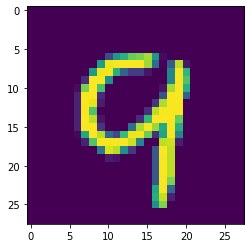

In [45]:
import matplotlib.pyplot as plt

plt.imshow(x[0].view(28,28))

In [46]:
print(torch.argmax(net(x[0].view(-1,28*28))))

tensor(9)
